[View in Colaboratory](https://colab.research.google.com/github/jimmyjamesarnold/10k_statistical_inferences/blob/master/10k_game_plots.ipynb)

10000 Dice Game in Python - when should you 'lock in' your score?

In [0]:
# 10000 in Python (for stats)
# single game, threshold = 200
# dice df generator 

# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain, combinations

In [0]:
def rollDice(n) :
    """ takes input n # dice to roll, returns pd.df"""
    rollList = pd.DataFrame([[n+1,np.random.randint(1, 6)] for n in range(n)])
    rollList.columns = ['die','face']
    return rollList
   
# method to count n-of-a-kind combos
def searchOnes(df):
    """pass in df from diceRoll, evaluates, saves scores and dice indices"""
    matched = len(df[df.face == 1].face)
    dice = df[df.face == 1].index.values
    if matched == 3: 
        options.append([1000, dice])
    elif matched > 3: 
        options.append([1000 * (2 ** (matched - 3)), dice])
            
def nOfaKind(df): 
    """pass in df from diceRoll, evaluates, saves scores and dice indices"""
    for i in range(2,7): 
        matched = len(df[df.face == i].face)
        dice = df[df.face == i].index.values         
        if matched == 3: 
            options.append([i*100, dice])
        elif matched > 3: 
            options.append([(i*100) * (2 ** (matched - 3)), dice])
            
def straight(df):# looks for straight
    """ looks for straight """
    if df.face.nunique() == 6:
        options.append([1000, df.index.values])
        
# Looks for 3 Pairs
def threePairs(df):
    """ Counts matched pairs in set, looks for 3 pairs of 2"""
    if list(Counter([(i,j) for i in df.die for j in df.face if i == j]).values()).count(2) == 3: # test for 3 sets of 2 in the list of counts of frequency of pairs
        options.append([1000, df.index.values])            
            
def comboSearch(df):
    """ search for scoring combos in set """
    searchOnes(df)
    nOfaKind(df)
    straight(df)
    threePairs(df)

In [0]:
scoreKeeper = []
for i in range(10):  
  gameScore = [0] #this games' score
  for rounds in range(30): #run the game for 30 cycles, see what scores are generated
      score = [0] #this round's score
      n = 6 # initialize n dice (6)
      while n > 0:
          options = [] # initialize options for storing combos, inside while so it's always fresh
          df = rollDice(n) #df of dice and faces
          comboSearch(df)
          dfOpt = pd.DataFrame(options, columns = ['points', 'dice'])
          if sum(dfOpt.points) > 0 :
              dfOpt = dfOpt[dfOpt.points == max(dfOpt.points)].reset_index() # subset for max points
              score = sum(score + dfOpt.points) # record score from sets
              df = df.drop(dfOpt.dice[0]) # drop scored dice
          else: score = 0 
          del options[:] # delete options
          dfOpt = pd.DataFrame(columns=dfOpt.columns) # clears dfOpt
          if len(df.index.values) > 0: # checks remaining dice for 1s and 5s
              extra = sum([100*len(df[df.face == 1].face)] + [50*len(df[df.face == 5].face)]) # count up 100s and 50s
              score = score + extra # add extra points
              df = df.drop(df[df.face == 1].index.values)
              df = df.drop(df[df.face == 5].index.values)     # drops remaining 1s and 5s
          if score == 0: # You rolled nothing
              gameScore.append(gameScore[-1])
              n = 0 # ends turn
          elif score >= 200 and gameScore[-1] >= 1000: # Hit "threshold", lock in 
                  gameScore.append(gameScore[-1] + score)
                  n = 0 # ends turn
          elif score >= 1000: #You're on the board
                  gameScore.append(gameScore[-1] + score)
                  n = 0 # ends turn
          else: # threshold not hit, re-roll dice
              if len(df.index.values) > 0:
                      n = len(df.index.values) # re-roll remaining dice.
              else: n = 6 # All dice were used, but threshold not hit, re-roll
  scoreKeeper.append(gameScore[-1])

In [4]:
print(scoreKeeper)

[14150, 14900, 13200, 14850, 20000, 13550, 13200, 14600, 15000, 12900]


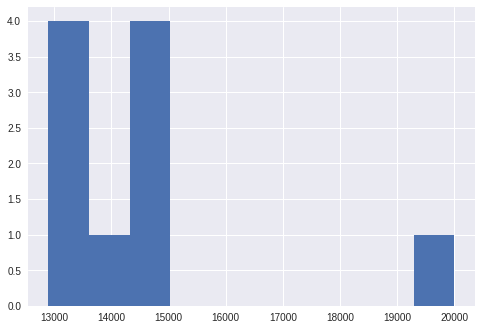

In [7]:
plt.hist(scoreKeeper)
plt.show()